In [16]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [17]:
import yal

#modules = yal.read('./yal_files/ami33.yal')

modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

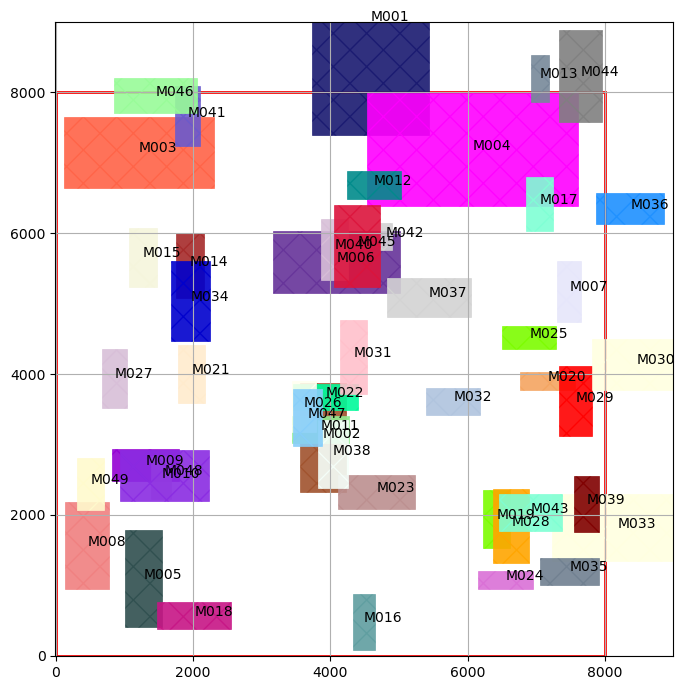

In [18]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 8000,
               "height" : 8000}

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 9000, 9000)

In [19]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


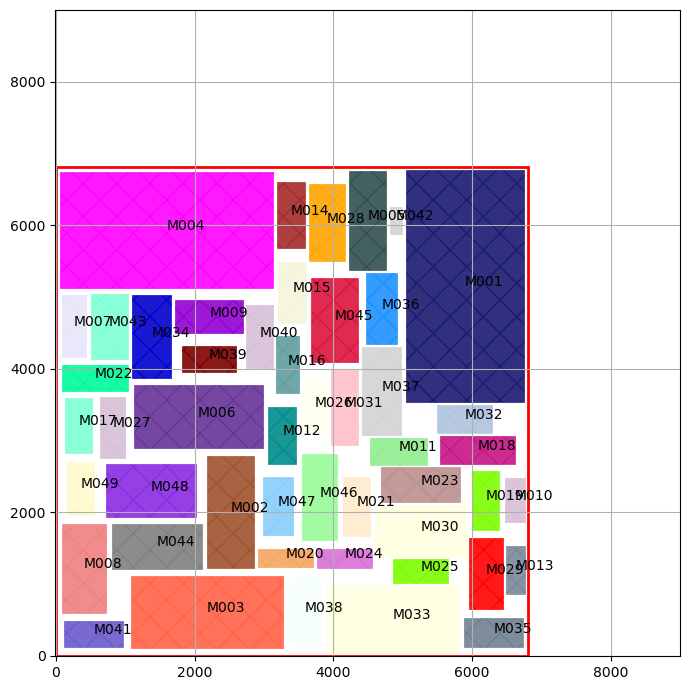

{'M001': 'center', 'M002': 'center', 'M003': 'center', 'M004': 'center', 'M005': 'center', 'M006': 'center', 'M007': 'center', 'M008': 'center', 'M009': 'center', 'M010': 'center', 'M011': 'center', 'M012': 'center', 'M013': 'center', 'M014': 'center', 'M015': 'center', 'M016': 'center', 'M017': 'center', 'M018': 'center', 'M019': 'center', 'M020': 'center', 'M021': 'center', 'M022': 'center', 'M023': 'center', 'M024': 'center', 'M025': 'center', 'M026': 'center', 'M027': 'center', 'M028': 'center', 'M029': 'center', 'M030': 'center', 'M031': 'center', 'M032': 'center', 'M033': 'center', 'M034': 'center', 'M035': 'center', 'M036': 'center', 'M037': 'center', 'M038': 'center', 'M039': 'center', 'M040': 'center', 'M041': 'center', 'M042': 'center', 'M043': 'center', 'M044': 'center', 'M045': 'center', 'M046': 'center', 'M047': 'center', 'M048': 'center', 'M049': 'center'}
Current deadspace : 23.606928004707 %


In [20]:
while True:

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 9000, 9000)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    print(last_moves)

    if moves.count('center') + moves.count('linger') == len(participants):

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 25:
            break

        else:
            layout_zone         = scale_layout_zone(layout_zone, 0.99)

            participants        = reset_after_tightening(participants)



    # Minimum distance to large!